# Digital Image Processing Tutorial

In [169]:
from skimage import data
import matplotlib.pyplot as plt

# Load the images from scikit-image module 
rocket_image = data.rocket() # rocket_image (427, 640, 3), RGB-3.
coffee_image = data.coffee() # coffee_image (400, 600, 3), RGB-3.
coin_image = data.coins() #coins_image has a shape of (303, 384), grayscale. 

print(rocket_image.shape, coffee_image.shape, coin_image.shape)

(427, 640, 3) (400, 600, 3) (303, 384)


In [170]:
#visualise image
def show_image(image, title = 'Image', cmap_type = 'grey'):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()


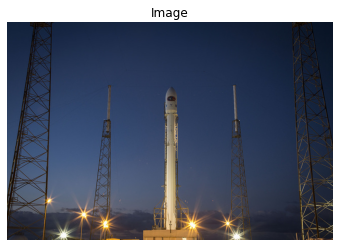

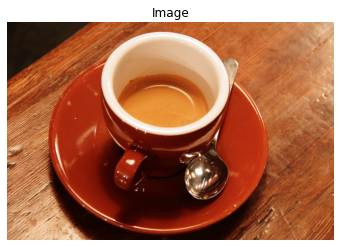

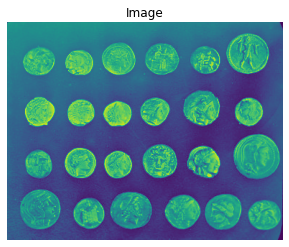

In [171]:
show_image(rocket_image)
show_image(coffee_image)
show_image(coin_image)

In [172]:
#convert RGB to grayscale
from skimage import color
grayscale = color.rgb2gray(rocket_image)
#convert grayscale to RGB
rgb = color.gray2rgb(grayscale)

(427, 640, 3) (427, 640) (427, 640, 3)


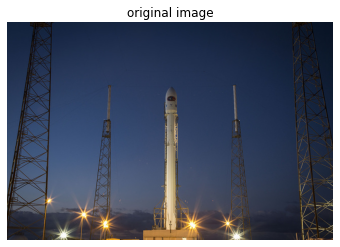

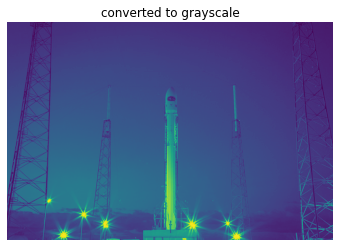

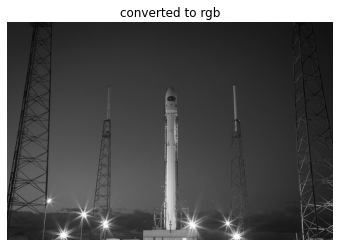

In [173]:
print(rocket_image.shape, grayscale.shape, rgb.shape)
show_image(rocket_image, 'original image')
show_image(grayscale, 'converted to grayscale')
show_image(rgb, 'converted to rgb')

(407, 359, 3)


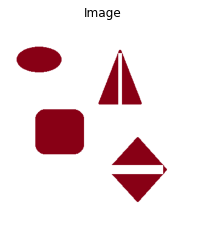

In [174]:
# loading image using matplotlib
image_1 = plt.imread('/Users/imak/Documents/Python/Projects/Digital_Image_Processing/Assignment 1-Image topology and geometric transformations/Image1.png')
print(image_1.shape)
show_image(image_1)

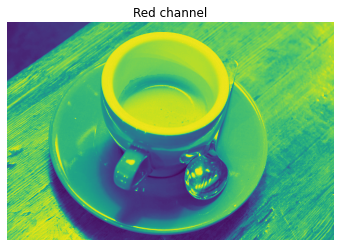

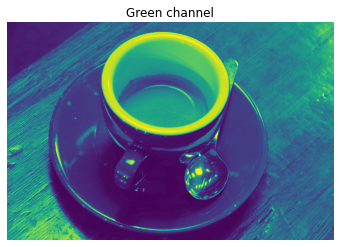

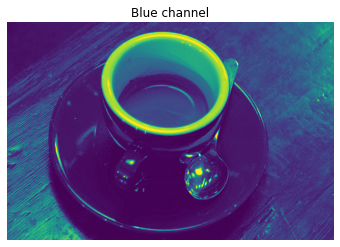

In [175]:
image = coffee_image

#obtain red value of the image
red = image[:,:,0]
#obtain green value of the image
green = image[:,:,1]
#obtain blue value of the image
blue = image[:,:,2]

#visualise all the 
show_image(red, 'Red channel')
show_image(green, 'Green channel')
show_image(blue, 'Blue channel')

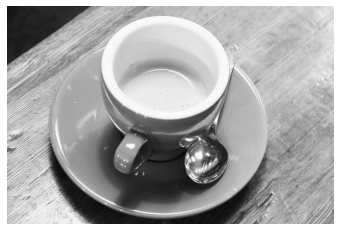

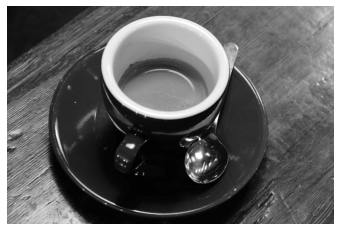

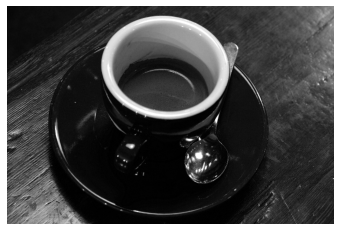

In [176]:
# see image in grey colormap
plt.imshow(red, cmap="gray")
plt.axis('off')
plt.show()
plt.imshow(green, cmap="gray")
plt.axis('off')
plt.show()
plt.imshow(blue, cmap="gray")
plt.axis('off')
plt.show()

image type:  <class 'numpy.ndarray'>


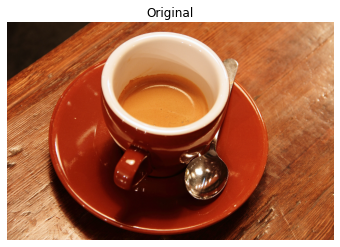

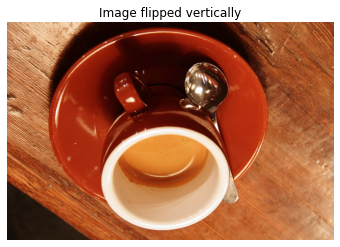

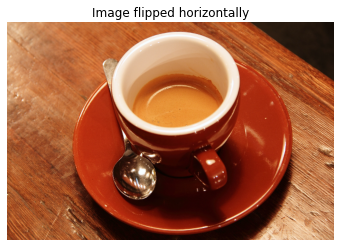

In [177]:
import numpy as np

#image type
print('image type: ',type(coffee_image))

#origital image
show_image(coffee_image, 'Original')

# filp image vertically
vertically_flipped = np.flipud(coffee_image)
show_image(vertically_flipped, 'Image flipped vertically')

# filp image horizontally
horizontally_flipped = np.fliplr(coffee_image)
show_image(horizontally_flipped, 'Image flipped horizontally')

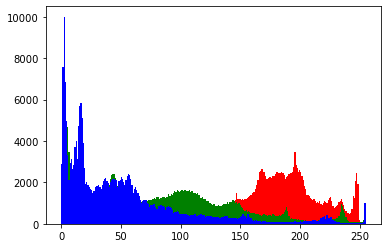

In [178]:
#obrtain a red channel histogram
plt.hist(red.ravel(), bins=256, color = 'r')
#obrtain a green channel histogram
plt.hist(green.ravel(), bins=256, color = 'g')
#obrtain a blue channel histogram
plt.hist(blue.ravel(), bins=256, color = 'b')
plt.show()


### Thresholding is the simplest method of image segmentation
Thresholding is used to partition the background and foreground of grayscale images, by essentially making them black and white. We compare each pixel to a given threshold value. If the pixel is less than that value, we turn it white. If it's greater; we turn it black.

Image shape is : (839, 986, 3)
Image shape now is : (839, 986)


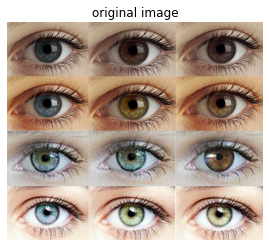

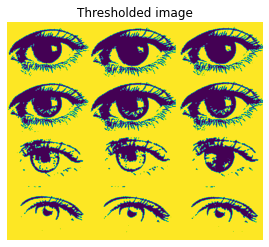

In [179]:
# loading image using matplotlib
eye = plt.imread('/Users/imak/Documents/Python/Projects/Digital_Image_Processing/eye.jpeg')

print('Image shape is :',eye.shape)

# Make the image grayscale using rgb2gray
eye_gray = color.rgb2gray(eye)

print('Image shape now is :',eye_gray.shape)

# obtain the optimal threshold value
threshold = .4

#apply threshold to image
binary  = eye_gray > threshold
show_image(eye, 'original image')
show_image(binary, 'Thresholded image')

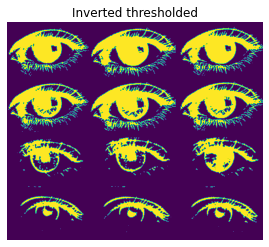

In [180]:
#apply inverse thresholding to image
inverted_binary = eye_gray <= threshold
show_image(inverted_binary, 'Inverted thresholded')

[]

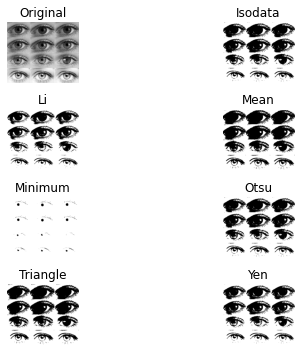

In [181]:
#More thresholding algorithm
from skimage.filters import try_all_threshold

#obtain all resulting image
fig,ax = try_all_threshold(eye_gray, verbose=False)
plt.plot()

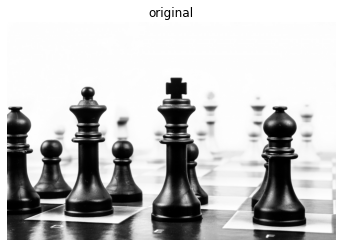

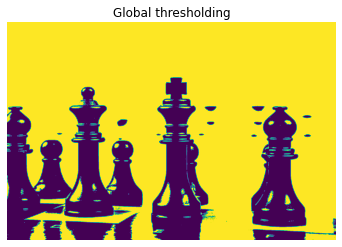

In [182]:
# When the background of an image seems uniform, global thresholding works best.
# loading image using matplotlib
chess = plt.imread('/Users/imak/Documents/Python/Projects/Digital_Image_Processing/bw.jpg')
# Make the image grayscale using rgb2gray
chess_gray = color.rgb2gray(chess)

#import otsu threshold function
from skimage.filters import threshold_otsu

#obtain optimal threshold value
global_threshold = threshold_otsu(chess_gray)

#apply thresholding to image
binary_global = chess_gray > global_threshold

show_image(chess, 'original')
show_image(binary_global, 'Global thresholding')

<ipython-input-183-b77a52cd3309>:7: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  moon_sharp_gray = color.rgb2gray(moon_sharp)


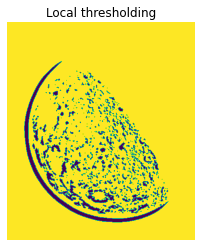

In [183]:
# If the image doesn't have high contrast or the background is uneven, local thresholding produces better results

#import local threshold function
from skimage.filters import threshold_local
# loading image using matplotlib
moon_sharp = plt.imread('/Users/imak/Documents/Python/Projects/Digital_Image_Processing/moonunsharp.tif')
moon_sharp_gray = color.rgb2gray(moon_sharp)

#set the block size (aka local neighbourhood ) to 35
block_size = 35

#obtian the optimal local threshodling
local_threshold = threshold_local(moon_sharp_gray, block_size, offset=10)

#apply local thresholding and obtian the binary image
binary_local = moon_sharp_gray > local_threshold

show_image(binary_local, 'Local thresholding')

## Filters, Contrast, Transformation and Morphology 

### Filters
Filtering is a technique for modifying or enhancing an image. In essence, a filter is a mathematical function that is applied to images. It can be used to,  
- emphasize or remove certain features, like edges.   
- Smoothing,   
- sharpening and   
- edge detection. 

#### Edge detection
With filtering we can detect edges. This technique can be used to find the boundaries of objects within images. As well as segment and extract information like how many coins are in an image. Most of the shape information of an image is enclosed in edges.  
A common edge detection algorithm is Sobel.

<ipython-input-185-3942e7776cdb>:5: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  coin_image_gray = color.rgb2gray(coin_image)


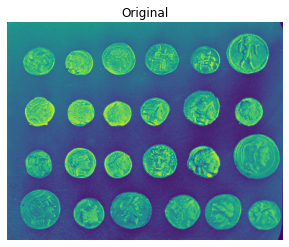

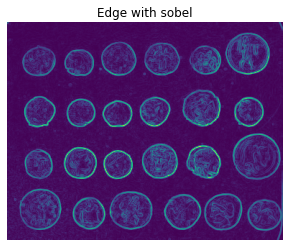

In [185]:
# import module and function
from skimage.filters import sobel

# Make the image grayscale using rgb2gray
coin_image_gray = color.rgb2gray(coin_image)

#apply edge detection filter
edge_sobel = sobel(coin_image_gray)

show_image(coin_image, 'Original')
show_image(edge_sobel, "Edge with sobel")